In [2]:
import sys
sys.path.append('../xrun')

In [3]:
import re

from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

from IPython.core.display import HTML
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

from xrun.data.run_info import RunInfo
from xrun.data.loader import load_dataset


In [4]:
X_census = load_dataset(input_path="../data/input/USCensus1990.data.txt")

Loading Census data from ../data/input/USCensus1990.data.txt...
Loaded in 66.22 secs


In [5]:
X_census.shape

(2458285, 68)

In [6]:
pca_census = PCA().fit(X_census)

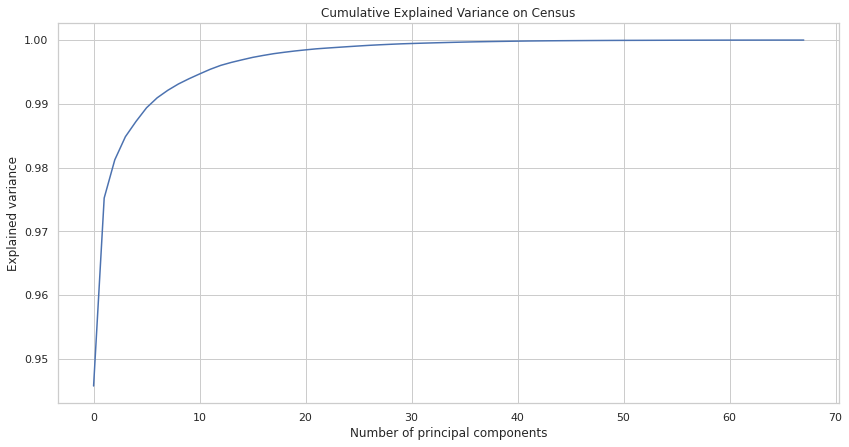

In [7]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(np.cumsum(pca_census.explained_variance_ratio_))
ax.set_title("Cumulative Explained Variance on Census")
ax.set_xlabel("Number of principal components")
ax.set_ylabel("Explained variance");

In [8]:
X_covertype = load_dataset(input_path="../data/input/covtype.data.gz")

Loading Covertype dataset from ../data/input/covtype.data.gz...
Loaded in 15.33 secs


In [9]:
X_covertype.shape

(581012, 54)

In [10]:

pca_covertype = PCA().fit(X_covertype)

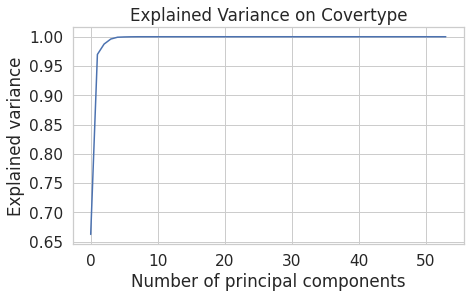

In [13]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.plot(np.cumsum(pca_covertype.explained_variance_ratio_))
    ax.set_title("Explained Variance on Covertype")
    ax.set_xlabel("Number of principal components")
    ax.set_ylabel("Explained variance");

In [15]:
X_caltech = load_dataset(input_path="../data/input/caltech101-sift.txt.gz")

Loading csv dataset from ../data/input/caltech101-sift.txt.gz...
Loaded matrix of shape (3680458, 128) in 88.15 secs


In [16]:
X_caltech.shape

(3680458, 128)

In [17]:
pca_caltech = PCA().fit(X_caltech)

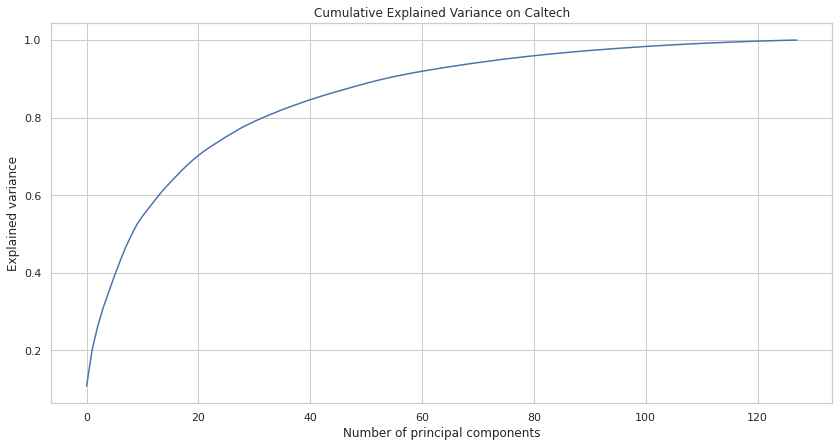

In [18]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(np.cumsum(pca_caltech.explained_variance_ratio_))
ax.set_title("Cumulative Explained Variance on Caltech")
ax.set_xlabel("Number of principal components")
ax.set_ylabel("Explained variance");

In [57]:
caltech_var = np.cumsum(pca_caltech.explained_variance_ratio_)
covertype_var = np.cumsum(pca_covertype.explained_variance_ratio_)
census_var = np.cumsum(pca_census.explained_variance_ratio_)

max_len = np.max([
    caltech_var.shape[0],
    covertype_var.shape[0],
    census_var.shape[0]
])

data_dict = dict({
    "Caltech": caltech_var, 
    "Covertype": covertype_var, 
    "Census": census_var, 
})
for name, arr in data_dict.items():
    ones = np.ones(max_len - arr.shape[0]) * np.nan
    data_dict[name] = np.append(arr, ones)

    
df = pd.DataFrame()

for name, arr in data_dict.items():
    df = df.append(pd.DataFrame({
        "explained_variance": data_dict[name],
        "dataset": name,
        "component": list(range(1, max_len+1))
    }))

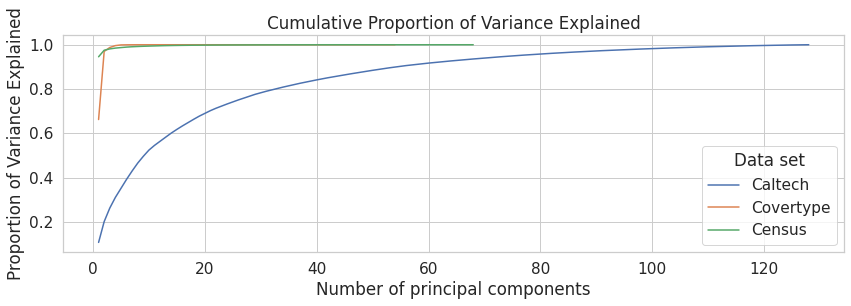

In [61]:
with sns.plotting_context("notebook", font_scale=1.4):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.lineplot(x="component", y="explained_variance", hue="dataset", data=df)
    ax.set_title("Cumulative Proportion of Variance Explained")
    ax.set_xlabel("Number of principal components")
    ax.legend(title="Data set")
    ax.set_ylabel("Proportion of Variance Explained");
    # fig.savefig(f"plots/explained-variance-plot.pdf", bbox_inches="tight")